In [30]:
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [3]:
data = pd.read_csv('Prostate_Cancer.csv',index_col=0)

In [4]:
data.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
id,,,,,,,,,
1,M,23,12,151,954,0.143,0.278,0.242,0.079
2,B,9,13,133,1326,0.143,0.079,0.181,0.057
3,M,21,27,130,1203,0.125,0.160,0.207,0.060
4,M,14,16,78,386,0.070,0.284,0.260,0.097
5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 9 columns):
diagnosis_result     100 non-null object
radius               100 non-null int64
texture              100 non-null int64
perimeter            100 non-null int64
area                 100 non-null int64
smoothness           100 non-null float64
compactness          100 non-null float64
symmetry             100 non-null float64
fractal_dimension    100 non-null float64
dtypes: float64(4), int64(4), object(1)
memory usage: 7.8+ KB


Since the diagnosis_result column is in text , we need to convert it to binary so that it can be fed into the algorithm.

In [6]:
new_df=pd.get_dummies(data,columns=['diagnosis_result'],drop_first=True)

In [7]:
new_df.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,diagnosis_result_M
id,,,,,,,,,
1,23,12,151,954,0.143,0.278,0.242,0.079,1.0
2,9,13,133,1326,0.143,0.079,0.181,0.057,0.0
3,21,27,130,1203,0.125,0.160,0.207,0.060,1.0
4,14,16,78,386,0.070,0.284,0.260,0.097,1.0
5,9,19,135,1297,0.141,0.133,0.181,0.059,1.0


In [8]:
#using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(new_df.drop('diagnosis_result_M',axis=1))
#removing the last column of the dataframe as this table will be used for the feature matrix
scaled_features=scaler.transform(new_df.drop('diagnosis_result_M',axis=1))
new_data=pd.DataFrame(scaled_features,columns=new_df.columns[:-1])

In [9]:
new_data.head()

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1.266830,-1.205746,2.301611,0.789417,2.764210,2.486970,1.594151,1.764464
1,-1.617011,-1.012208,1.537520,1.958830,2.764210,-0.784061,-0.397314,-0.948199
2,0.854853,1.697335,1.410172,1.572169,1.528655,0.547364,0.451507,-0.578290
3,-0.587068,-0.431591,-0.797201,-0.996139,-2.246650,2.585594,2.181796,3.983916
4,-1.617011,0.149025,1.622419,1.867666,2.626926,0.103555,-0.397314,-0.701593


In [10]:
#feature matrix
X=new_data

In [12]:
#target matrix
y=new_df['diagnosis_result_M']

In [13]:
from sklearn.cross_validation import train_test_split

In [14]:
#allocating 33% of the dataset for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
# random value of n_neighbors, we will find a better value of k later.
knn = KNeighborsClassifier(n_neighbors=1)

In [17]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [18]:
pred=knn.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

        0.0       0.79      0.69      0.73        16
        1.0       0.74      0.82      0.78        17

avg / total       0.76      0.76      0.76        33



In [21]:
#since a precision of only 76%, we'll try to use another value for k

error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

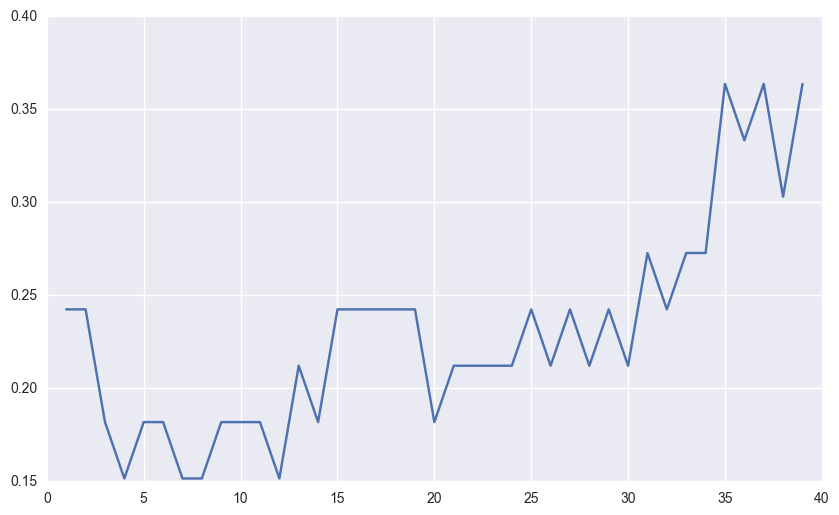

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate)

It can be seen from the above plot that the error is least when k=4

In [26]:
knn=KNeighborsClassifier(n_neighbors=4)

In [27]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [28]:
new_pred=knn.predict(X_test)

In [29]:
print(classification_report(y_test,new_pred))

             precision    recall  f1-score   support

        0.0       0.92      0.75      0.83        16
        1.0       0.80      0.94      0.86        17

avg / total       0.86      0.85      0.85        33



The model is now 86% precise, compared to 76% when a random value of K was chosen